In [33]:
import psycopg2
import constantes
import pandas as pd
import matplotlib.pyplot as plt

# Substitua os valores abaixo com as suas credenciais de conexão
conn = psycopg2.connect(
    host=constantes.DB_HOST,
    database=constantes.DB_NAME,
    user=constantes.DB_USER,
    password=constantes.DB_PASSWORD
)

query = """
SELECT 
    username,
    to_char(scrobble_date, 'YYYY_MM') AS month,
    count(*) AS scrobble_count
FROM 
    scrobbles_2024
GROUP BY 
    username, month
ORDER BY 
    username, month;
"""

df = pd.read_sql_query(query, conn)

conn.close()

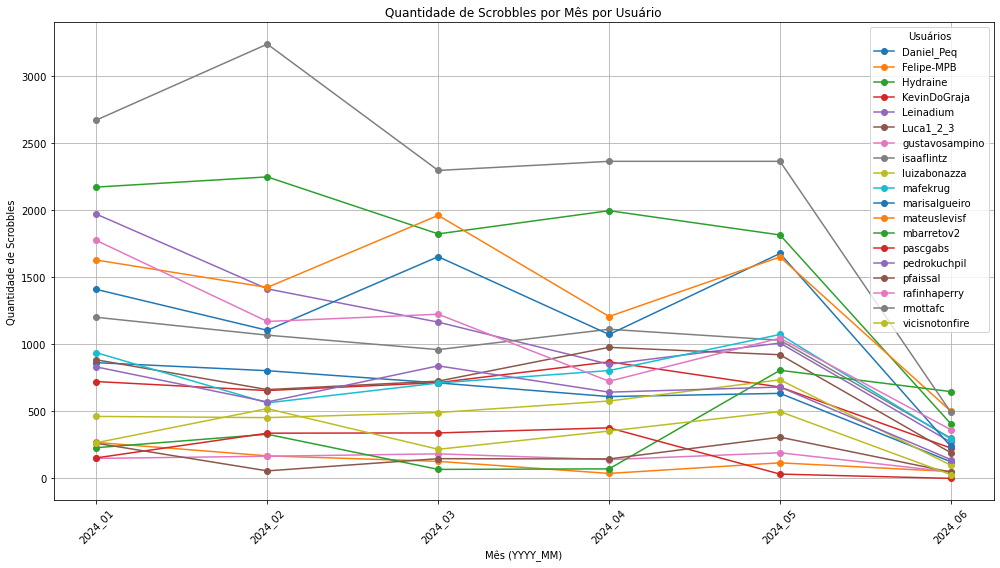

In [34]:
df_pivot = df.pivot(index='month', columns='username', values='scrobble_count')
df_pivot = df_pivot.fillna(0)

plt.figure(figsize=(14, 8))

for user in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[user], marker='o', label=user)

plt.title('Quantidade de Scrobbles por Mês por Usuário')
plt.xlabel('Mês (YYYY_MM)')
plt.ylabel('Quantidade de Scrobbles')
plt.legend(title='Usuários')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

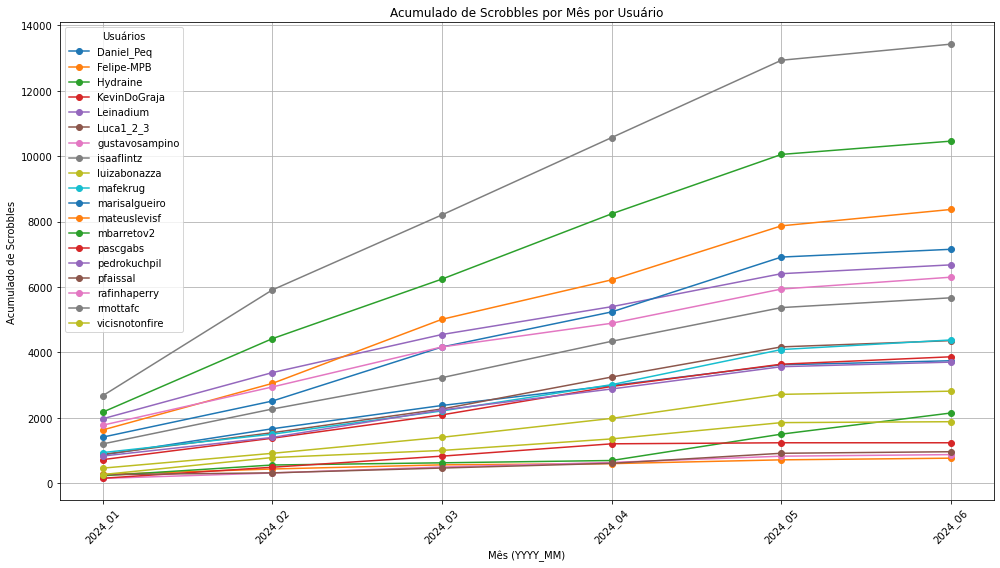

In [35]:
# Substitua os valores abaixo com as suas credenciais de conexão
conn = psycopg2.connect(
    host=constantes.DB_HOST,
    database=constantes.DB_NAME,
    user=constantes.DB_USER,
    password=constantes.DB_PASSWORD
)

# Passo 4: Execute a consulta SQL
query = """
SELECT 
    username,
    to_char(scrobble_date, 'YYYY_MM') AS month,
    count(*) AS scrobble_count
FROM 
    scrobbles_2024
GROUP BY 
    username, month
ORDER BY 
    username, month;
"""

# Passo 5: Carregue os dados em um DataFrame do pandas
df = pd.read_sql_query(query, conn)

# Passo 6: Feche a conexão com o banco de dados
conn.close()

# Passo 7: Prepare os dados para o gráfico acumulado
# Converta a coluna 'month' para um objeto datetime
df['month'] = pd.to_datetime(df['month'] + '_01', format='%Y_%m_%d')

# Crie uma tabela pivotada
df_pivot = df.pivot(index='month', columns='username', values='scrobble_count')

# Substitua os NaNs por 0
df_pivot = df_pivot.fillna(0)

# Calcule o acumulado
df_pivot_cumsum = df_pivot.cumsum()

# Passo 8: Crie o gráfico de linha acumulado
plt.figure(figsize=(14, 8))

for user in df_pivot_cumsum.columns:
    plt.plot(df_pivot_cumsum.index.strftime('%Y_%m'), df_pivot_cumsum[user], marker='o', label=user)

plt.title('Acumulado de Scrobbles por Mês por Usuário')
plt.xlabel('Mês (YYYY_MM)')
plt.ylabel('Acumulado de Scrobbles')
plt.legend(title='Usuários')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Passo 9: Mostre o gráfico
plt.show()


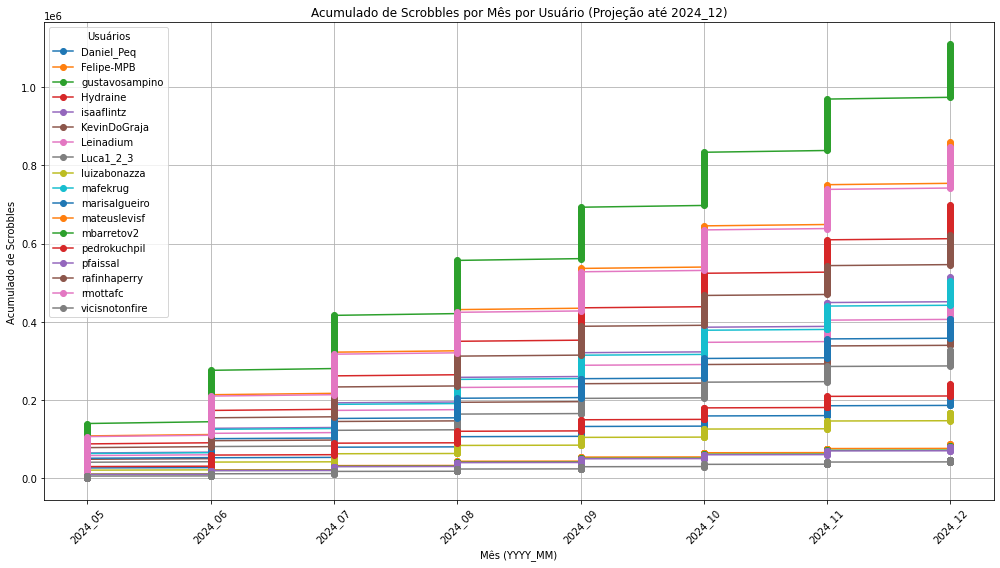

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [42]:
# Passo 1: Importe as bibliotecas necessárias
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Passo 2: Conecte ao banco de dados
# Substitua os valores abaixo com as suas credenciais de conexão
conn = psycopg2.connect(
    host=constantes.DB_HOST,
    database=constantes.DB_NAME,
    user=constantes.DB_USER,
    password=constantes.DB_PASSWORD
)

# Passo 3: Execute a consulta SQL para obter os scrobbles dos últimos sete dias por usuário
query = """
SELECT 
    username,
    count(*) AS scrobbles_last_seven_days
FROM 
    scrobbles_2024
WHERE
    scrobble_date >= CURRENT_DATE - INTERVAL '7 days'
GROUP BY 
    username;
"""

# Passo 4: Carregue os dados em um DataFrame do pandas
df_last_seven_days = pd.read_sql_query(query, conn)

# Passo 5: Feche a conexão com o banco de dados
conn.close()

# Passo 6: Prepare os dados para a projeção diária
projection = pd.DataFrame(columns=df_last_seven_days['username'], index=pd.date_range(start='2024-05-01', end='2024-12-31', freq='D'))
for user in projection.columns:
    mean_daily_scrobbles = df_last_seven_days[df_last_seven_days['username'] == user]['scrobbles_last_seven_days'].mean()
    projection[user] = mean_daily_scrobbles * 7  # Média diária multiplicada por 7 dias para obter a média semanal

# Passo 7: Calcule o acumulado até dezembro
cumulative_projection = projection.cumsum()

# Passo 8: Crie o gráfico de linha acumulado com a projeção
plt.figure(figsize=(14, 8))

for user in cumulative_projection.columns:
    plt.plot(cumulative_projection.index.strftime('%Y_%m'), cumulative_projection[user], marker='o', label=user)

plt.title('Acumulado de Scrobbles por Mês por Usuário (Projeção até 2024_12)')
plt.xlabel('Mês (YYYY_MM)')
plt.ylabel('Acumulado de Scrobbles')
plt.legend(title='Usuários')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Passo 9: Mostre o gráfico
plt.show()

# Passo 8: Crie o gráfico de linha acumulado com a projeção
plt.figure(figsize=(14, 8))

